In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("dataset.csv")

df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [4]:
df.nunique()

Age                    11
Employment Type         2
GraduateOrNot           2
AnnualIncome           30
FamilyMembers           8
ChronicDiseases         2
FrequentFlyer           2
EverTravelledAbroad     2
TravelInsurance         2
dtype: int64

In [5]:
#readable income amounts

df["AnnualIncome (k)"] = df["AnnualIncome"] / 1000

<AxesSubplot: xlabel='Employment Type', ylabel='count'>

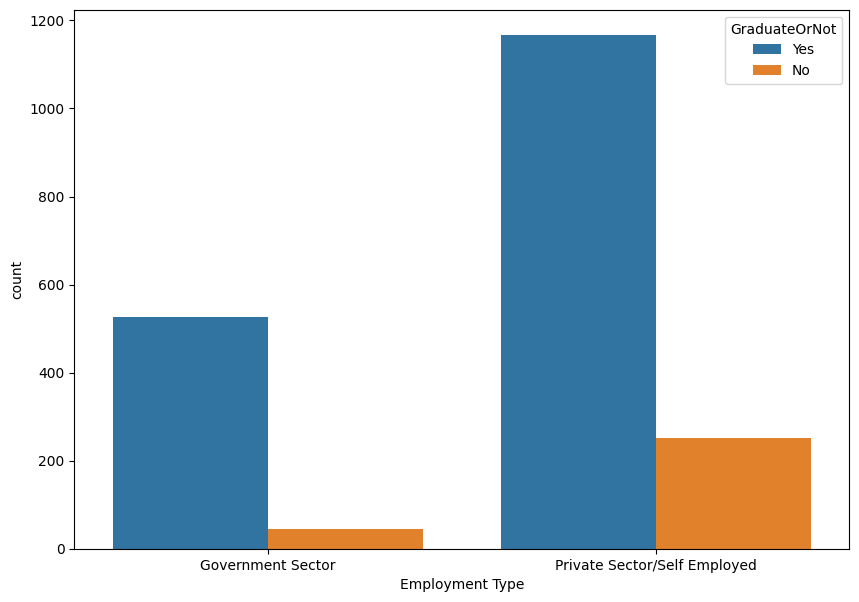

In [6]:
#ser params plots

plt.rcParams["figure.figsize"] = (10, 7)

sns.countplot(x="Employment Type", hue="GraduateOrNot", data=df)

In [7]:
df.corr()

C:\Users\CLAET - Francisco\AppData\Local\Temp\ipykernel_16000\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,AnnualIncome (k)
Age,1.000000,-0.020101,0.027409,0.007359,0.061060,-0.020101
AnnualIncome,-0.020101,1.000000,-0.015367,-0.001149,0.396763,1.000000
FamilyMembers,0.027409,-0.015367,1.000000,0.028209,0.079909,-0.015367
ChronicDiseases,0.007359,-0.001149,0.028209,1.000000,0.018190,-0.001149
TravelInsurance,0.061060,0.396763,0.079909,0.018190,1.000000,0.396763
AnnualIncome (k),-0.020101,1.000000,-0.015367,-0.001149,0.396763,1.000000


<AxesSubplot: xlabel='AnnualIncome (k)', ylabel='Count'>

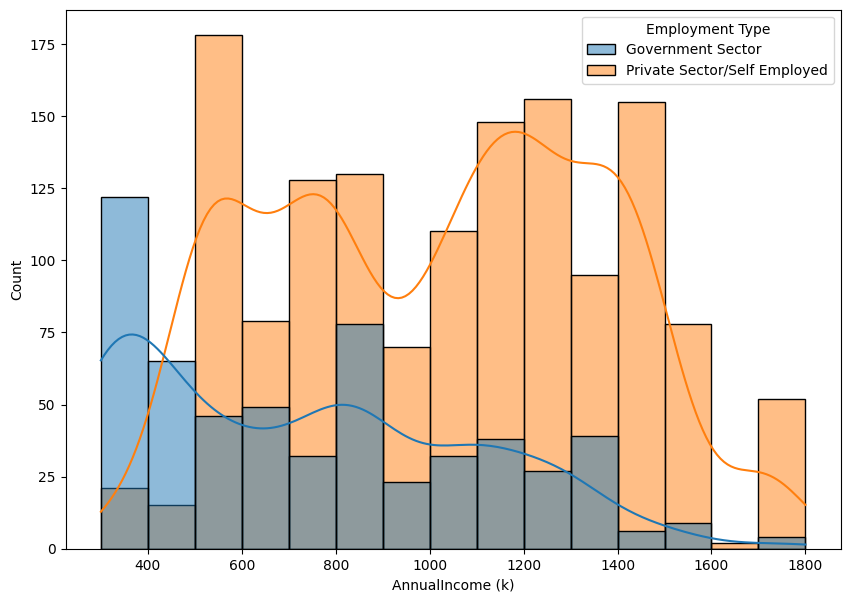

In [8]:
sns.histplot(x="AnnualIncome (k)", hue="Employment Type", data=df, kde=True)

<AxesSubplot: xlabel='AnnualIncome (k)'>

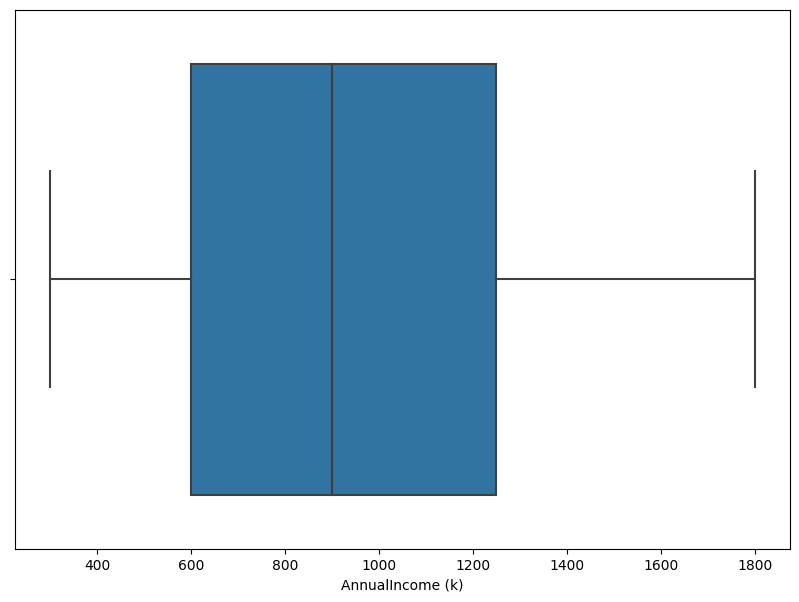

In [9]:
sns.boxplot(x="AnnualIncome (k)", data=df)

In [10]:
df["AnnualIncome (k)"].nsmallest(3)

31    300.0
36    300.0
53    300.0
Name: AnnualIncome (k), dtype: float64

<AxesSubplot: xlabel='AnnualIncome (k)', ylabel='Count'>

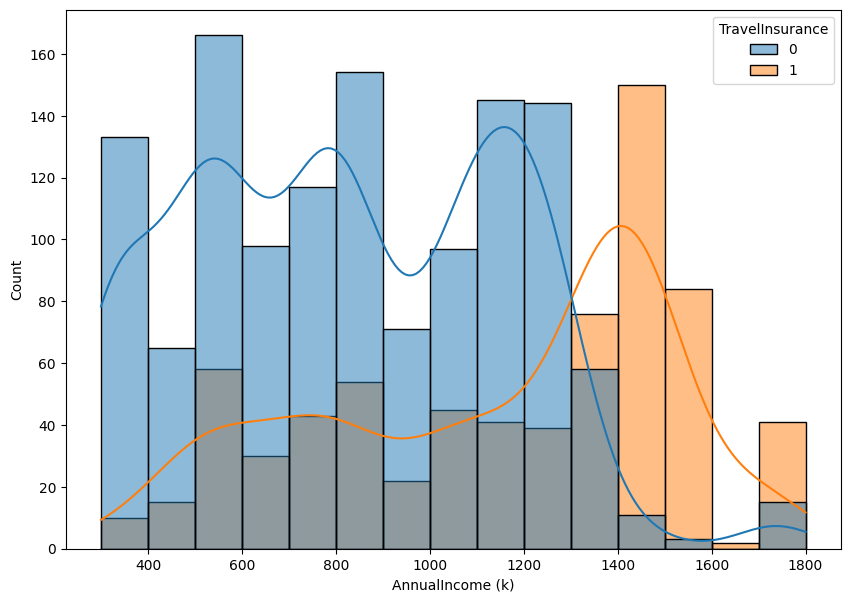

In [11]:
sns.histplot(x="AnnualIncome (k)", hue="TravelInsurance", data=df, kde=True)

Percentage of people who get's insurance that had travelled abroad: 78.42%
Percentage of people who get's insurance that had NOT travelled abroad: 25.64%


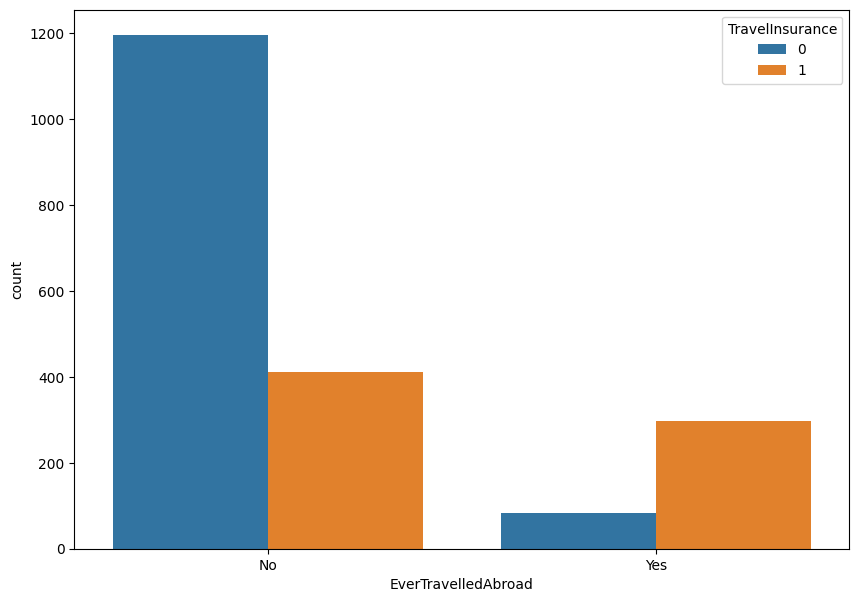

In [12]:
#check between nr of travels and travel insurance

sns.countplot(x="EverTravelledAbroad", hue="TravelInsurance", data=df)


#percentage of people who get insurance travelling abroad

abroad_data = df[df["EverTravelledAbroad"] == "Yes"]

print(f"Percentage of people who get's insurance that had travelled abroad: {round(abroad_data.TravelInsurance.value_counts()[1] / len(abroad_data) * 100, 2)}%")

#percentage of people who gets insurance travellinh abroad

not_abroad_data = df[df["EverTravelledAbroad"] == "No"]

print(f"Percentage of people who get's insurance that had NOT travelled abroad: {round(not_abroad_data.TravelInsurance.value_counts()[1] / len(not_abroad_data) * 100, 2)}%")

#most pleople who travel abroad get insurance

We can see that almost 80% of whom travelled abroad had get travel insurance. The same isn't showned from those who had not travell abroad.

People how go abroad tend to get travel insurance because don't want to worry about something going wrong on a different country, that may get difficult and expensive to solved.
Taking fundation on point 1, people who did get insurance on broad flights and have seen that insurance pays of tend to do it when travelling "inhouse" too
The point above are true in reverse for people who do not travalled abroad since they don't see the need to get insurance since travelling inside the own country, because things may be more easily resolved on the same "culture"

<AxesSubplot: xlabel='AnnualIncome (k)', ylabel='Count'>

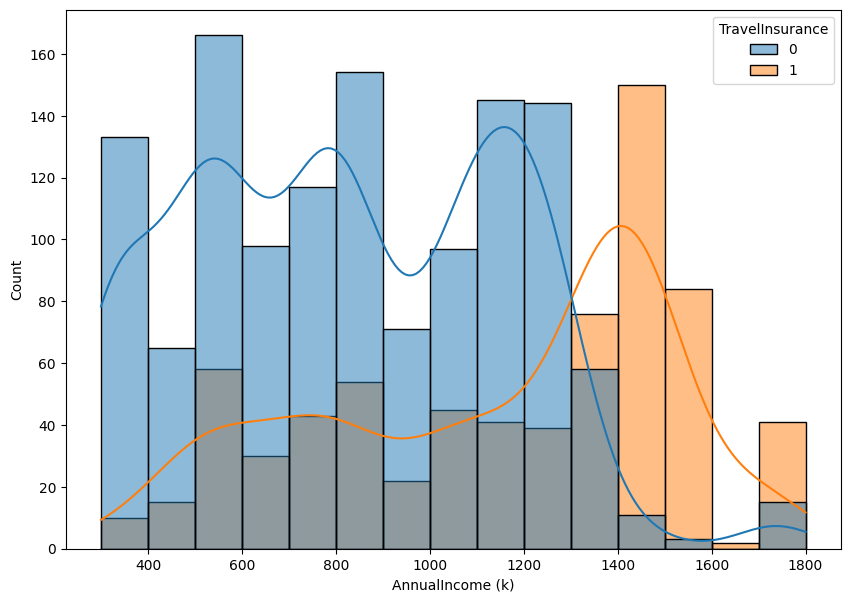

In [13]:
#check the percentage of people who have insurance by annualincome

sns.histplot(x="AnnualIncome (k)", hue="TravelInsurance", data=df, kde=True)

<AxesSubplot: xlabel='Employment Type', ylabel='count'>

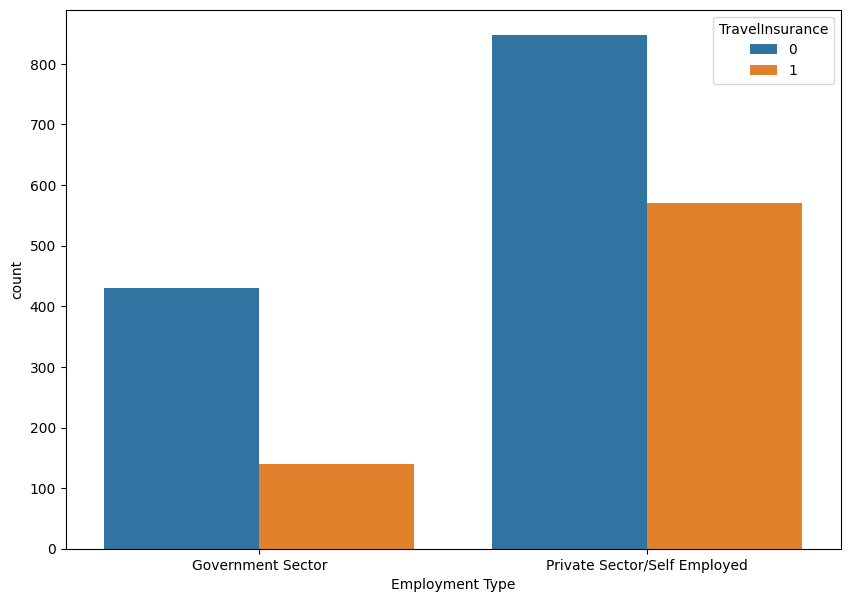

In [14]:
#check the percentage of people who have insurance by type of work

sns.countplot(x="Employment Type", hue="TravelInsurance", data=df)

<AxesSubplot: xlabel='FrequentFlyer', ylabel='count'>

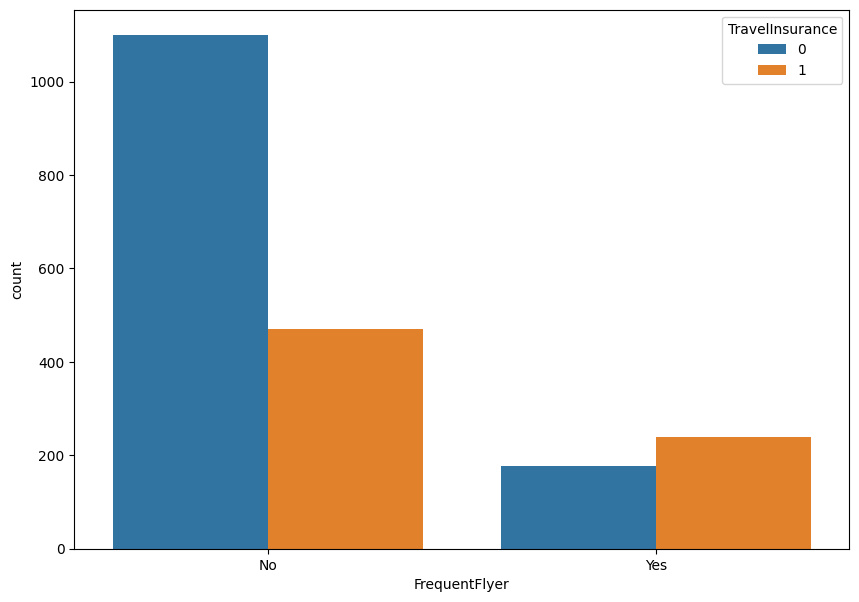

In [15]:
#check the percentage of people who have insurance by number of travel

sns.countplot(x="FrequentFlyer", hue="TravelInsurance", data=df)

<AxesSubplot: xlabel='Age', ylabel='count'>

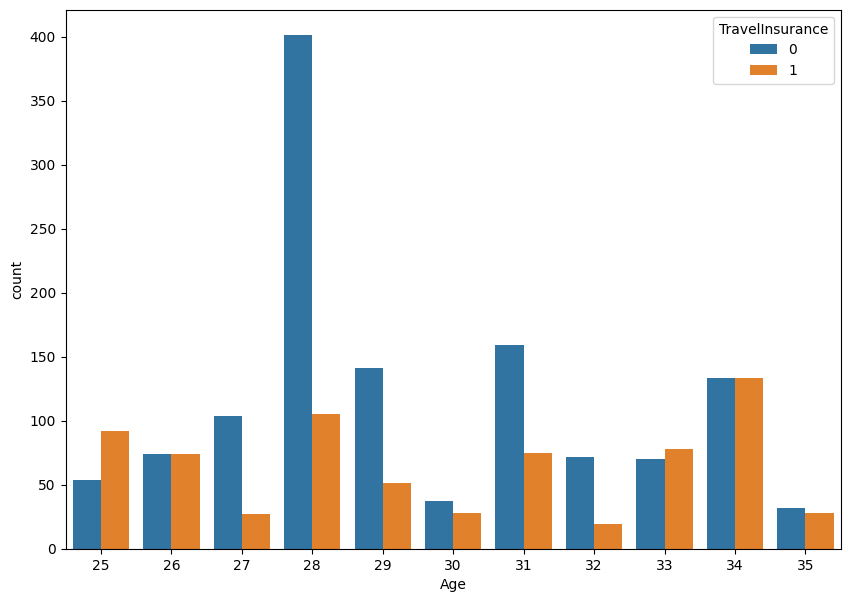

In [16]:
#check insurance by age

sns.countplot(x="Age", hue="TravelInsurance", data=df)

<AxesSubplot: xlabel='FamilyMembers', ylabel='count'>

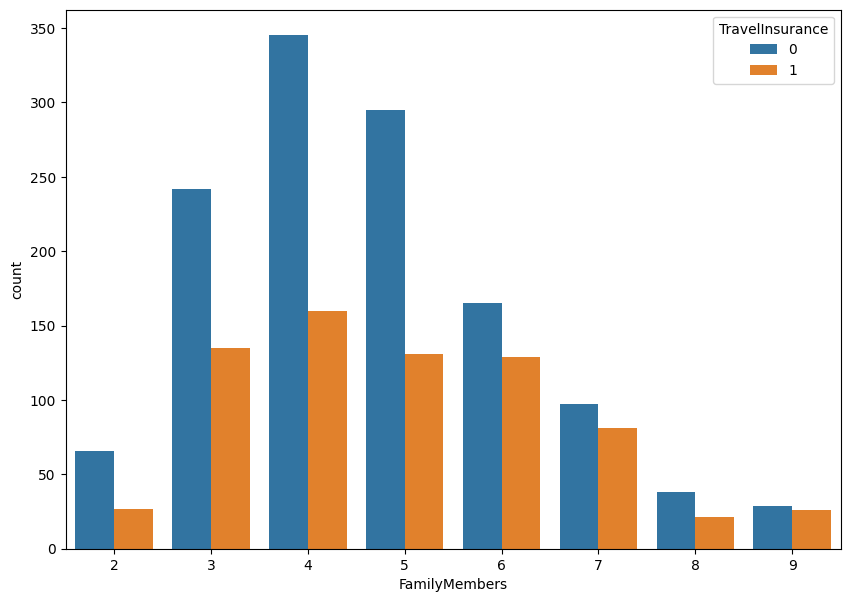

In [17]:
#check insurance by number of family members

sns.countplot(x="FamilyMembers", hue="TravelInsurance", data=df)

Percentage of people who get's insurance that have chronic diseases: 37.14%
Percentage of people who get's insurance that DO NOT have chronic diseases: 35.19%


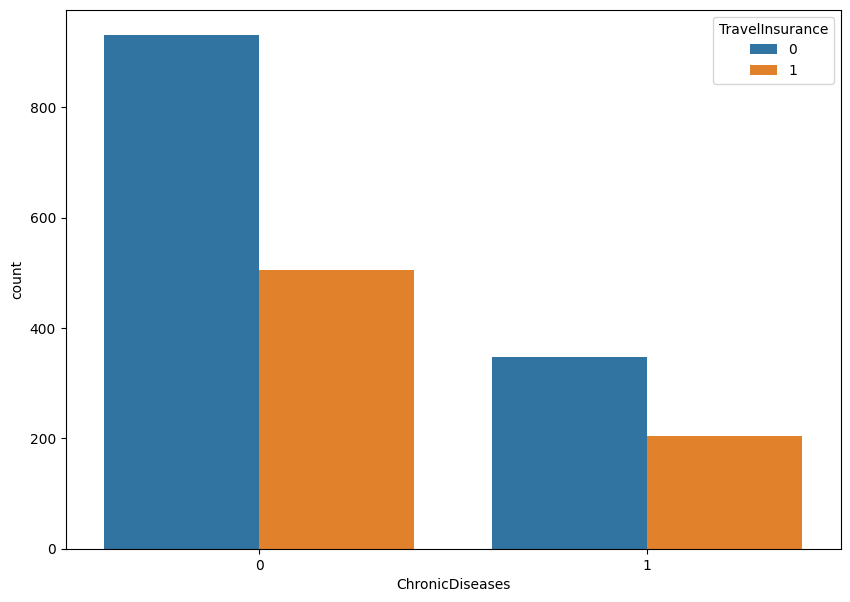

In [18]:
#check insurance by disease

sns.countplot(x="ChronicDiseases", hue="TravelInsurance", data=df)

#Percentages:

diseases_data = df[df["ChronicDiseases"] == 1]

not_diseases_data = df[df["ChronicDiseases"] == 0]


print(f"Percentage of people who get's insurance that have chronic diseases: {round(diseases_data.TravelInsurance.value_counts()[1] / len(diseases_data) * 100, 2)}%")

print(f"Percentage of people who get's insurance that DO NOT have chronic diseases: {round(not_diseases_data.TravelInsurance.value_counts()[1] / len(not_diseases_data) * 100, 2)}%")

Percentage of people who get's insurance that have a degree: 36.11%
Percentage of people who get's insurance that DO NOT have a degree: 33.56%


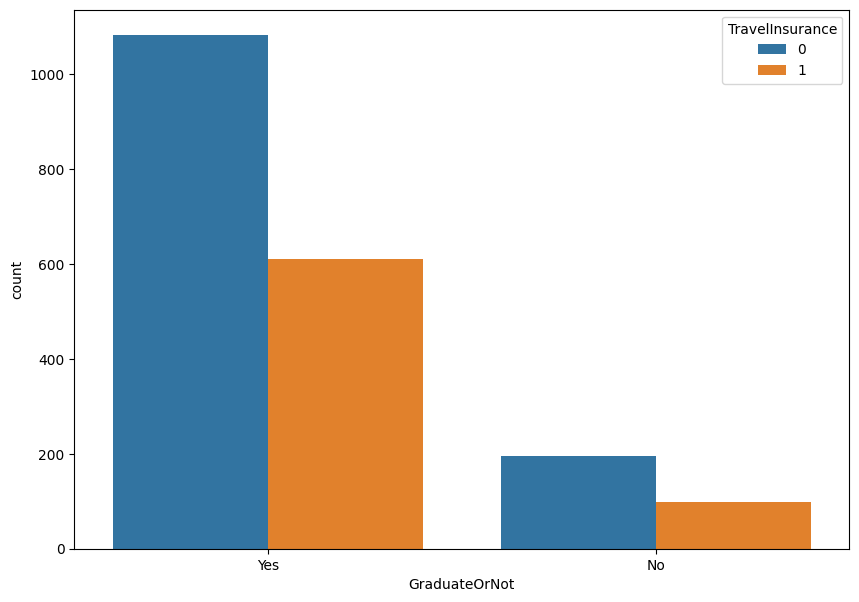

In [19]:
#check insurance by graduate or not

sns.countplot(x="GraduateOrNot", hue="TravelInsurance", data=df)

graduate_data = df[df["GraduateOrNot"] == "Yes"]

not_graduate_data = df[df["GraduateOrNot"] == "No"]


print(f"Percentage of people who get's insurance that have a degree: {round(graduate_data.TravelInsurance.value_counts()[1] / len(graduate_data) * 100, 2)}%")

print(f"Percentage of people who get's insurance that DO NOT have a degree: {round(not_graduate_data.TravelInsurance.value_counts()[1] / len(not_graduate_data) * 100, 2)}%")

No relation between having a degree and getting insurance

We have to adress the fact that the dataset in compouse of only young adults

In [42]:
#MACHINE LEARNING
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [21]:
df_ml = df.drop("AnnualIncome (k)", axis=1)

In [22]:
categories = df_ml.select_dtypes(include="object")
categories

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
0,Government Sector,Yes,No,No
1,Private Sector/Self Employed,Yes,No,No
2,Private Sector/Self Employed,Yes,No,No
3,Private Sector/Self Employed,Yes,No,No
4,Private Sector/Self Employed,Yes,Yes,No
...,...,...,...,...
1982,Private Sector/Self Employed,Yes,Yes,Yes
1983,Private Sector/Self Employed,Yes,No,Yes
1984,Private Sector/Self Employed,Yes,No,No
1985,Private Sector/Self Employed,Yes,Yes,Yes


In [23]:
ohe = OneHotEncoder(drop="first")

In [24]:
column = ohe.fit_transform(categories)

In [25]:
column.toarray()

array([[0., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       ...,
       [1., 1., 0., 0.],
       [1., 1., 1., 1.],
       [1., 1., 0., 0.]])

In [26]:
hot_encoded = pd.DataFrame(column.toarray())

In [27]:
df_ml[["Employment Type", "GraduateOrNot", "FrequentFlyer", "EverTravelledAbroad"]] = hot_encoded

In [28]:
ss = StandardScaler()
ss_columns = df_ml[["Age", "AnnualIncome"]]

In [29]:
new_columns = ss.fit_transform(ss_columns)

In [30]:
df_ml[["Age", "AnnualIncome"]] = new_columns

In [31]:
X = df_ml.drop("TravelInsurance", axis=1)
y = df_ml["TravelInsurance"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [33]:
rfc = RandomForestClassifier()

In [34]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
rfc.score(X_test, y_test)

0.8028169014084507

In [36]:
import xgboost as xgb

In [37]:
model = xgb.XGBClassifier()

In [40]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [44]:
y_pred = model.predict(X_test)

In [45]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       319
           1       0.81      0.61      0.69       178

    accuracy                           0.81       497
   macro avg       0.81      0.76      0.78       497
weighted avg       0.81      0.81      0.80       497

[[293  26]
 [ 70 108]]


In [46]:
print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_squared_log_error(y_test, y_pred))

0.15973371843189743
0.09280380148118175


In [51]:
#Another one

In [54]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2', C=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [55]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.7887323943661971


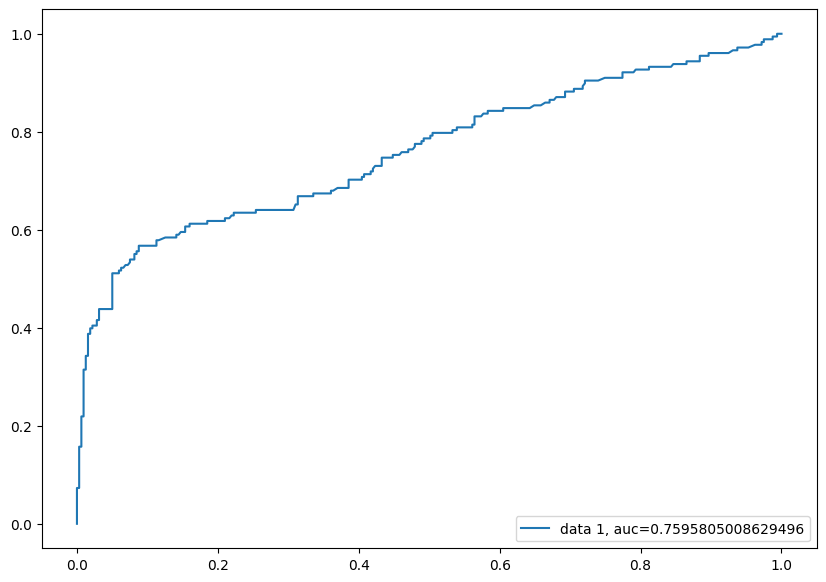

In [56]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()